In [273]:
## 
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def tidy_df(df):
    df.drop(['url', 'updated'], axis = 1, inplace = True)
    df.price = df.price.astype('int', errors = 'ignore')
    df.cylinders = df.cylinders.str.replace(' cylinders', '')
    df.cylinders = df.cylinders.astype('int', errors = 'ignore')
    df.posted = pd.to_datetime(df.posted)
    df = df[df.year < 2019]
    return df

# Ann Arbor
adf = tidy_df(pd.read_csv('annarbor.csv'))
# Detroit
ddf = tidy_df(pd.read_csv('detroit.csv'))

<IPython.core.display.Javascript object>


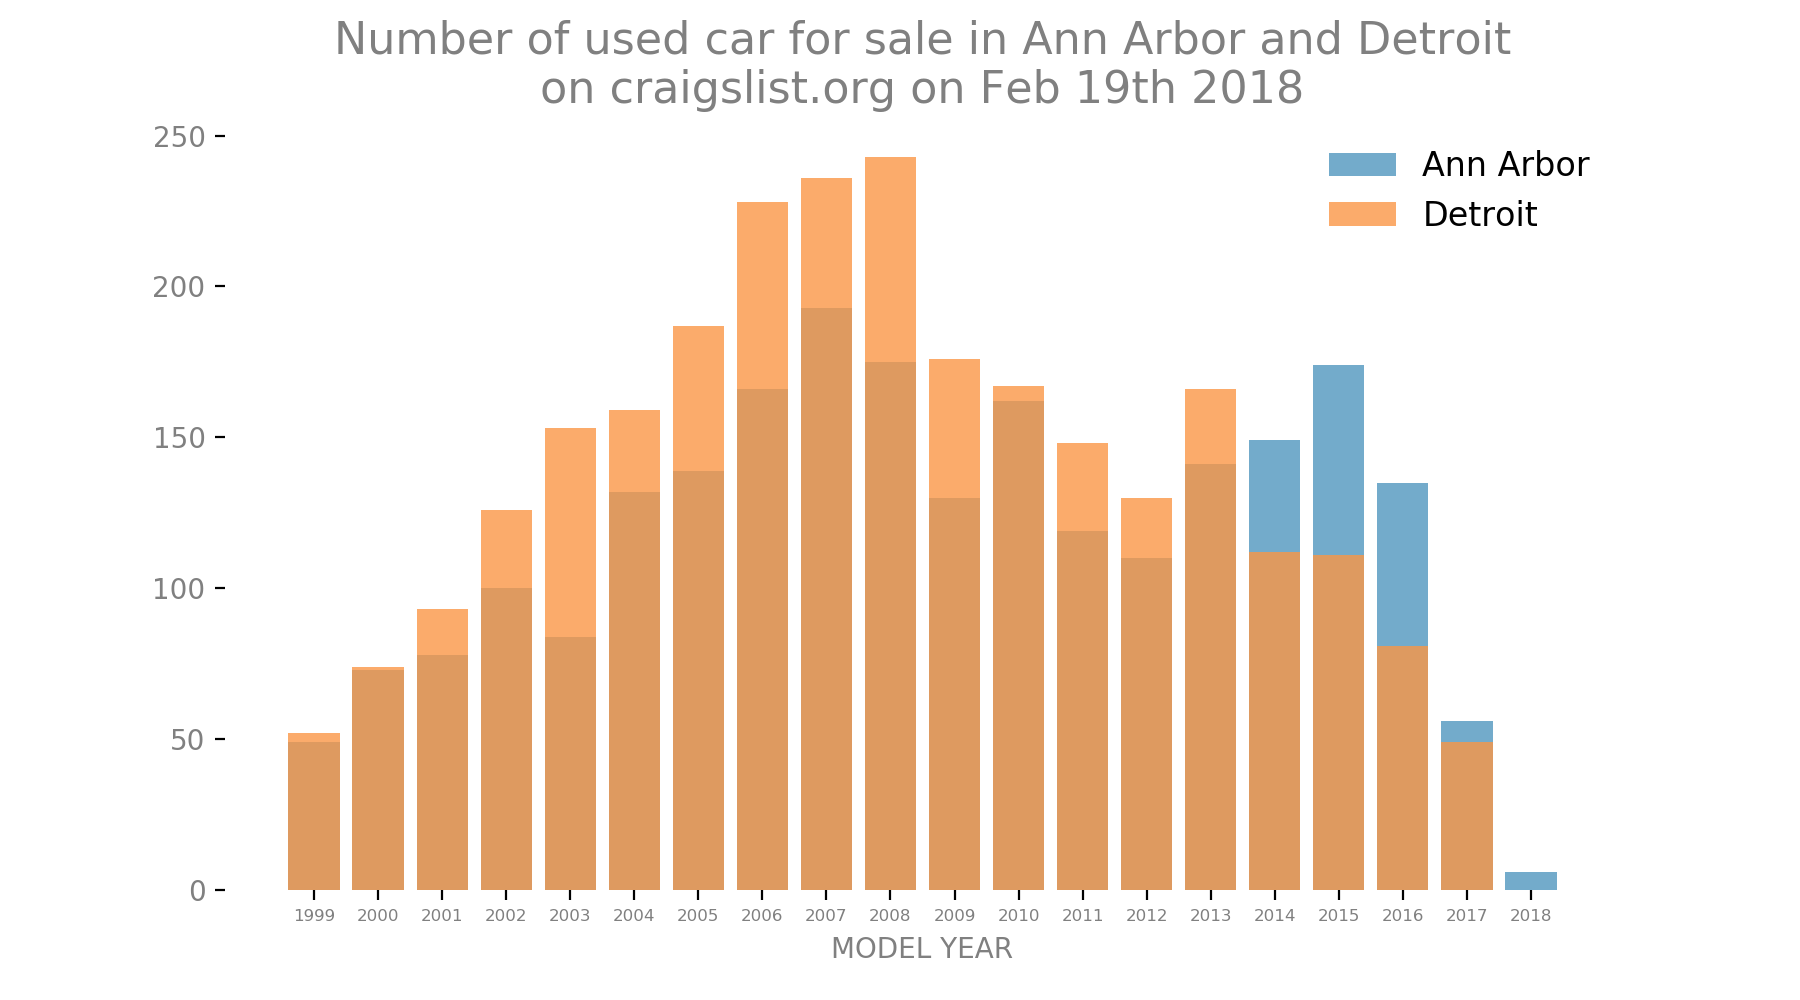

In [274]:
plt.figure()
plt.hist(adf['year'].dropna(), bins = range(1999, 2020), color = '#5096be', alpha = 0.8, rwidth=0.8)
plt.hist(ddf['year'].dropna(), bins = range(1999, 2019), color = '#fa9646', alpha = 0.8, rwidth=0.8)
plt.xticks(np.arange(1999.5,2019,1), range(1999, 2019), fontsize = 6, color = 'gray')
plt.yticks(color = 'gray')

plt.title('Number of used car for sale in Ann Arbor and Detroit\non craigslist.org on Feb 19th 2018', fontsize = 16, color = 'gray')
plt.xlabel('MODEL YEAR', fontsize = 10, color = 'gray')
    
legend_text = ['Ann Arbor', 'Detroit']
plt.legend(legend_text, prop={'size': 12}, frameon=False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.show()

<IPython.core.display.Javascript object>


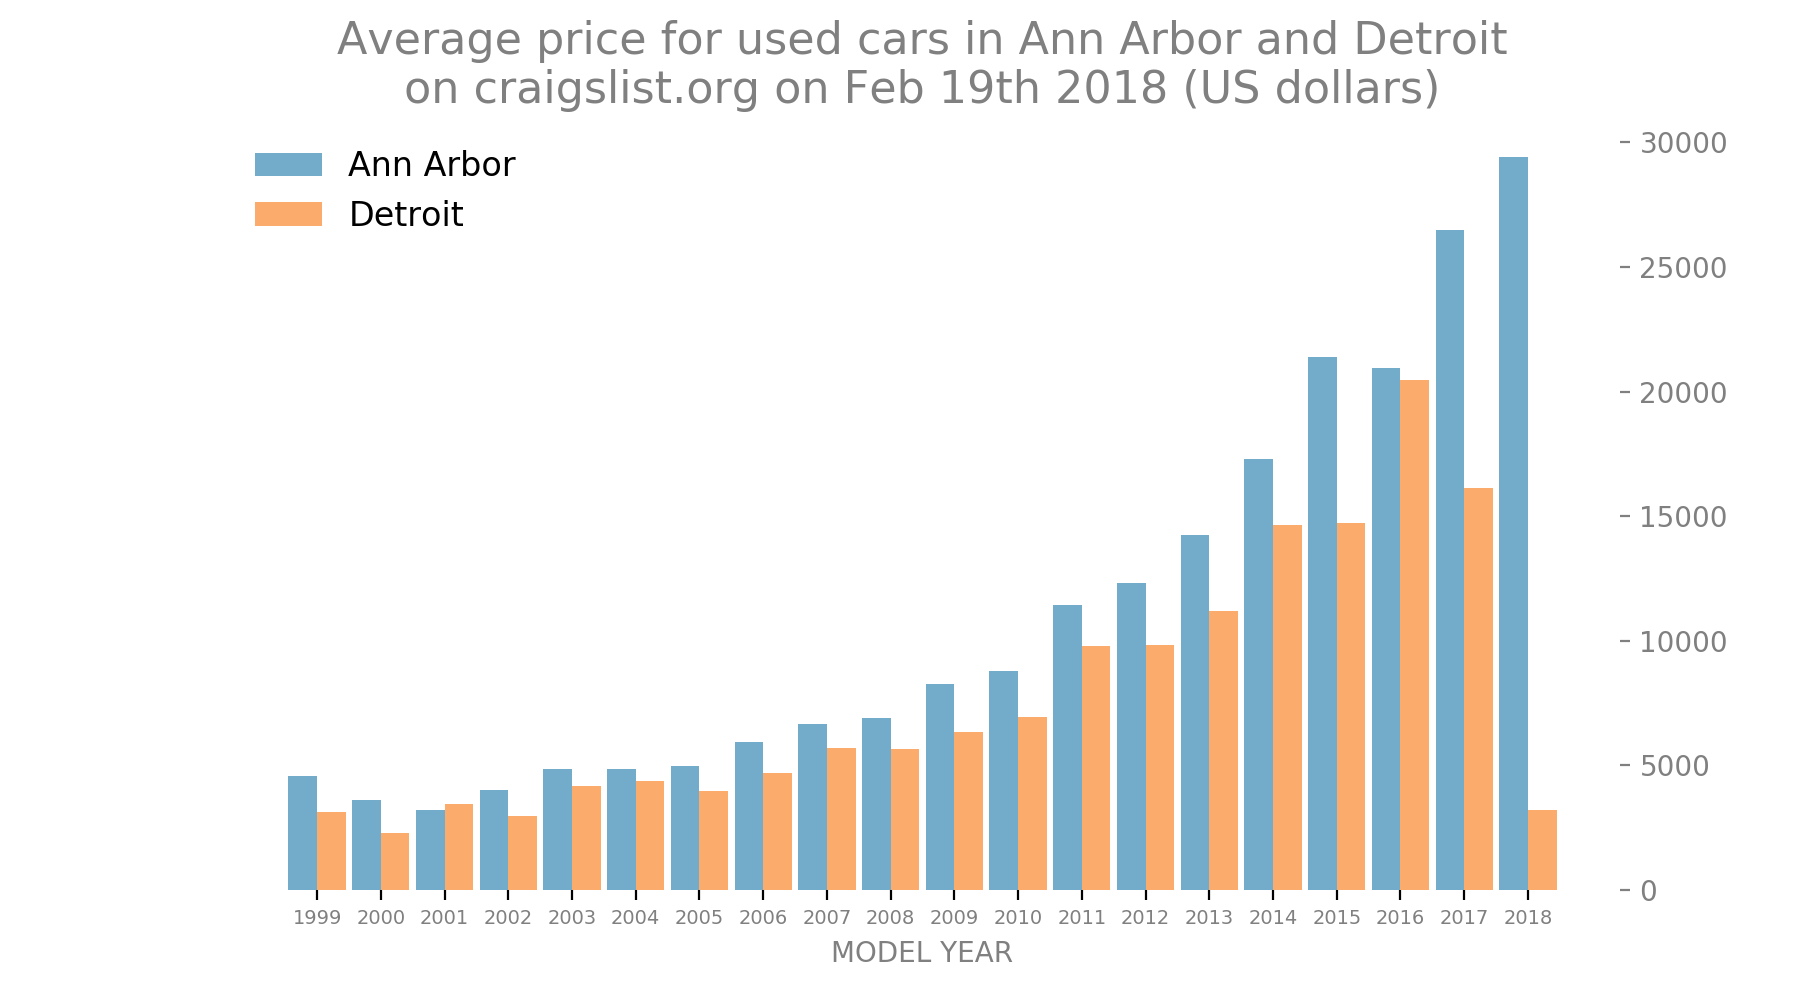

In [275]:
plt.figure()
adf_mean_price = (adf[(adf['year'] >=1999)].groupby('year').aggregate({'price':np.mean}))
ddf_mean_price = (ddf[(ddf['year'] >=1999)].groupby('year').aggregate({'price':np.mean}))
df = (pd.merge(adf_mean_price, ddf_mean_price, left_index = True, right_index = True)
      .rename(columns={'price_x': 'Ann Arbor'})
      .rename(columns={'price_y': 'Detroit'}))

barchart1 = plt.bar(np.arange(0,20), df['Ann Arbor'].values, width=0.45, color = '#5096be', alpha = 0.8)
barchart2 = plt.bar(np.arange(0,20)+0.45, df['Detroit'].values, width=0.45, color = '#fa9646', alpha = 0.8)

plt.xticks(np.arange(0,20)+0.225, range(1999, 2019), fontsize = 7, color = 'gray')

plt.title('Average price for used cars in Ann Arbor and Detroit\non craigslist.org on Feb 19th 2018 (US dollars)', fontsize = 16, color = 'gray')
plt.xlabel('MODEL YEAR', fontsize = 10, color = 'gray')
plt.ylabel('', fontsize = 16, color = 'gray')

axes = plt.gca()
axes.yaxis.tick_right()
axes.yaxis.set_label_position("right")
axes.yaxis.label.set_color('gray')
axes.tick_params(axis = 'y', colors = 'gray')

legend_text = ['Ann Arbor', 'Detroit']
plt.legend(legend_text, prop={'size': 12}, frameon=False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
fig = plt.gcf()
fig.set_size_inches(9, 5)

plt.show()